In [6]:
# configure the oath of Kaggle.json file

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Data Sets


In [4]:
!pip install kaggle

In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 92% 150M/163M [00:00<00:00, 1.57GB/s]
100% 163M/163M [00:00<00:00, 1.54GB/s]


In [8]:
#extracting the compessed Dataset

from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("The Dataset is extracted")

The Dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


Importing the Dependencies

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask/')
print(with_mask_files[0:5])
print(with_mask_files[-5:])


['with_mask_2884.jpg', 'with_mask_2207.jpg', 'with_mask_473.jpg', 'with_mask_1190.jpg', 'with_mask_859.jpg']
['with_mask_3352.jpg', 'with_mask_3094.jpg', 'with_mask_2367.jpg', 'with_mask_408.jpg', 'with_mask_2228.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask/')
print(without_mask_files[0:5])
print(without_mask_files[-5:])


['without_mask_3490.jpg', 'without_mask_2348.jpg', 'without_mask_307.jpg', 'without_mask_1278.jpg', 'without_mask_848.jpg']
['without_mask_3522.jpg', 'without_mask_1502.jpg', 'without_mask_2862.jpg', 'without_mask_414.jpg', 'without_mask_435.jpg']


In [13]:
print('Number of images with mask : ', len(with_mask_files))

Number of images with mask :  3725


In [14]:
print('Number of images without mask : ', len(without_mask_files))

Number of images without mask :  3828


Creating Labels for the two class of images

with mask --> 1
without mask --> 0

In [16]:
#create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [18]:
print(with_mask_labels [0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [20]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [21]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**


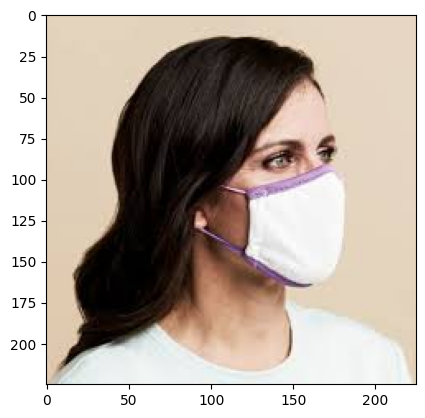

In [23]:
# displaying with mask images

img = mpimg.imread('/content/data/with_mask/with_mask_3094.jpg')
imgplot = plt.imshow(img)
plt.show()

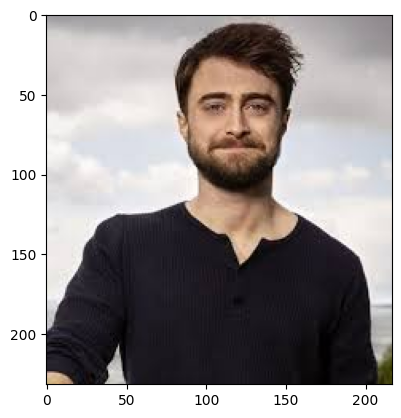

In [24]:
# displaying with mask images

img = mpimg.imread('/content/data/without_mask/without_mask_3490.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images
2. Convert the image to numpy arrays

In [25]:
# Convert images to numpy arrays

with_mask_path = '/content/data/with_mask/'
data = []
for img_file in with_mask_files:
  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:
  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [26]:
type(data)

list

In [28]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[210, 196, 187],
        [201, 187, 178],
        [205, 191, 182],
        ...,
        [ 31,  38,  66],
        [ 30,  37,  65],
        [ 30,  36,  63]],

       [[203, 189, 180],
        [202, 188, 179],
        [197, 183, 174],
        ...,
        [ 30,  37,  65],
        [ 28,  35,  63],
        [ 27,  33,  60]],

       [[195, 180, 169],
        [200, 185, 174],
        [204, 188, 178],
        ...,
        [ 28,  35,  62],
        [ 27,  34,  58],
        [ 25,  35,  59]]], dtype=uint8)
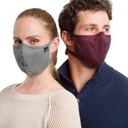

In [27]:
data[0]

In [29]:
type(data[0])

numpy.ndarray

In [30]:
data[0].shape

(128, 128, 3)

In [32]:
#Converting Image List and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [33]:
type(X)

numpy.ndarray

In [34]:
type(Y)

numpy.ndarray

In [36]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


**Train Test Split**

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2, random_state=2)

In [38]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [39]:
#scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
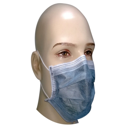

In [43]:
X_train[0]

In [44]:
X_train_scaled[0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

Building a Convolutional Neural Networks (CNN)

In [47]:
import tensorflow as tf
from tensorflow import keras

In [49]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [50]:
#compile the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [51]:
#training the neural network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - acc: 0.7148 - loss: 0.6331 - val_acc: 0.8694 - val_loss: 0.3574
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8757 - loss: 0.3080 - val_acc: 0.8876 - val_loss: 0.2758
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.8883 - loss: 0.2571 - val_acc: 0.8975 - val_loss: 0.2426
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - acc: 0.9056 - loss: 0.2214 - val_acc: 0.8562 - val_loss: 0.3383
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - acc: 0.9159 - loss: 0.2199 - val_acc: 0.9140 - val_loss: 0.2064


**Model Evaluation**

In [52]:
loss,accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy = ', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - acc: 0.9197 - loss: 0.1952
Test Accuracy =  0.9238914847373962


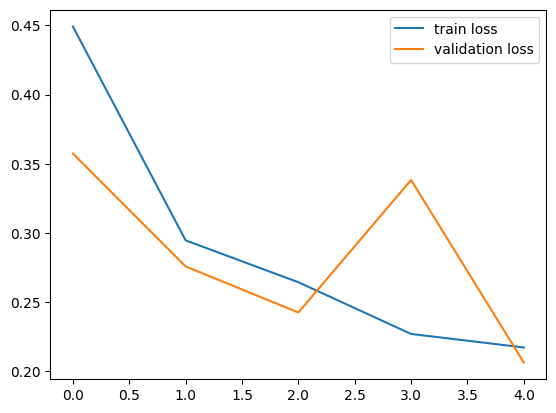

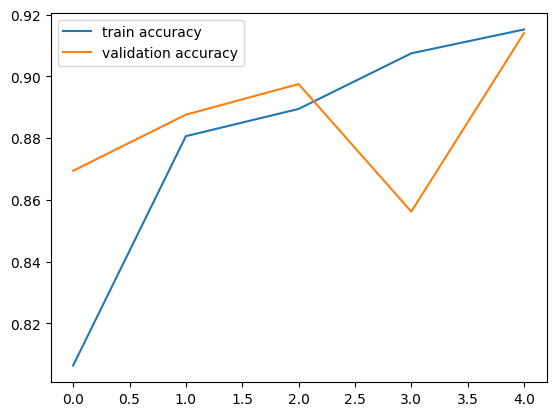

In [55]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

In [ ]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image,(128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled,[1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


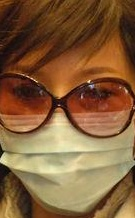

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[0.47400308 0.63800347]]
1
The person in the image is wearing a mask


In [62]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')